In [6]:
(require '[clojupyter.misc.helper :as h])
(require '[clojupyter.misc.display :as d])

(h/add-dependencies '[incanter "1.5.7"])
(h/add-dependencies '[org.clojure/math.numeric-tower "0.0.4"])

(require '[clojure.core.reducers :as r])
(use '(incanter core stats charts io))

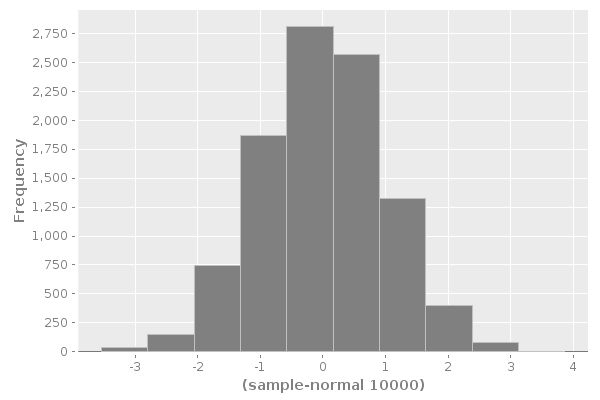

In [7]:
(d/display 
    (d/make-incanter-plot (histogram (sample-normal 10000))))

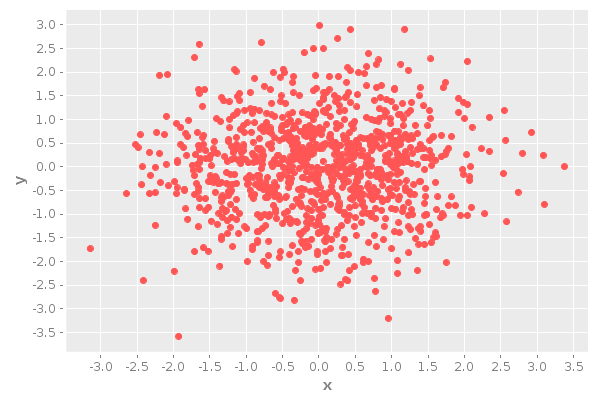

In [8]:
(d/display 
    (d/make-incanter-plot (scatter-plot (sample-normal 1000) 
                                        (sample-normal 1000)
                                        :x-label "x" :y-label "y"
                                        )))

In [9]:
(defn GBM [S_0 mu sigma dt n-step]
    (let [W  (map (partial * sigma) (sample-normal n-step :sd dt))
          step (fn [s W]
                   (let [ds (exp (+ (* (- mu (/ (pow sigma 2) 2)) dt) W)) ]
                        (* s ds)
                       ))]
            (reductions step (conj W S_0))));

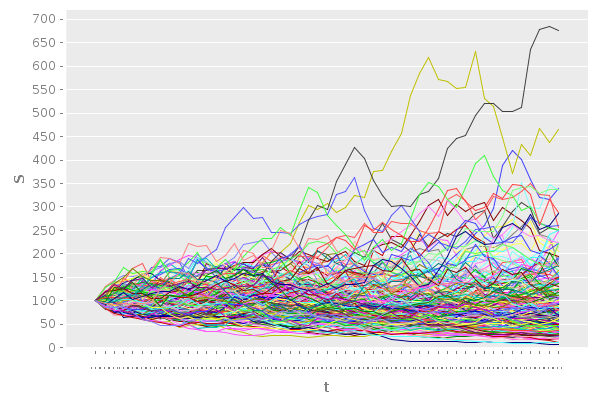

In [10]:
(let [gen-path (fn [] {:t (range 100)  :s (GBM 100 0 0.1 1 50)}) 
      paths (repeatedly 200 gen-path)]
      (d/display (d/make-incanter-plot 
          (loop [paths paths
                 chart nil
                 lable 0]
              (if-let [[path & paths] paths]
                      (recur paths 
                             (if chart
                                 (add-categories chart (:t path) (:s path) :series-label lable)
                                 (line-chart (:t path) (:s path) 
                                             :x-label "t" 
                                             :y-label "S")
                                 )
                             (inc lable))
                  chart ))))) 